In [9]:
import pandas as pd

import numpy as np
from tqdm import tqdm

from scipy.stats import mannwhitneyu



In [2]:
# ess gene
ess_noness = pd.read_csv('../../Data/PrimaryLibrary/design/essentials_nonessentials_CRISPRi_tiling_designs_v2.csv')
EssGene = ess_noness[ess_noness.Category == 'Essential']['Target Gene Symbol'].unique()
# chip
chip_path = '../../Data/CHiP_Histone/'
chrtest = pd.read_csv(chip_path+'CHIPseqPeakOverlap.csv')


In [3]:
InhouseEssCHIP = chrtest[(chrtest.DataSet == 'InHouse') & (chrtest['Target Gene Symbol'].isin(EssGene))]
otherCHIP = chrtest[~(chrtest.DataSet == 'InHouse')]
newCHIP = pd.concat([InhouseEssCHIP,otherCHIP])

In [14]:
def perform_mannwhitney_tests(chrtest, gene_col, phenotype):
    results = []
    # Get unique values from the specified columns
    CHIPseq = chrtest['chipseq'].unique()
    DataSet = chrtest['DataSet'].unique()
    Domain = chrtest['Domain'].unique()
    condition = chrtest['condition'].unique()

    # Iterate over the combinations of parameters
    for chip in tqdm(CHIPseq):
        
        for data in tqdm(DataSet):
            if data == 'InHouse':
                alter = 'greater'
            elif data == 'Nunez':
                alter = 'greater'
            elif data == 'Gilbert':
                alter = 'less'
            for krab in tqdm(Domain):
                for cell in tqdm(condition):
                    chrtest_subset = chrtest[(chrtest['chipseq'] == chip) & (chrtest['Domain'] == krab) & 
                                             (chrtest['DataSet'] == data) & (chrtest['condition'] == cell)]
                    for gene in chrtest_subset[gene_col].unique():
                        gene_sp = chrtest_subset[chrtest_subset[gene_col] == gene]
                        binary_col = 'overlap with peak'
                        if (sum(gene_sp[binary_col] == 1) >= 10) & (sum(gene_sp[binary_col] == 0) >= 10):
                            _, pval = mannwhitneyu(gene_sp[gene_sp[binary_col] == 0][phenotype], 
                                                   gene_sp[gene_sp[binary_col] == 1][phenotype], 
                                                   alternative=alter, method="asymptotic")
                            results.append({
                                'chipseq': chip,
                                'DataSet': data,
                                'Domain': krab,
                                'condition': cell,
                                'gene': gene,
                                'pval': pval
                            })
                        else:
                            print(f"{gene}: Sample size in overlap or non-overlap < 10")
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    
    return results_df


In [15]:
results_df = perform_mannwhitney_tests(newCHIP, 'Target Gene Symbol', 'orginal phenotype')


  0%|                                                     | 0/3 [00:00<?, ?it/s]

  0%|                                                     | 0/2 [00:00<?, ?it/s]


  0%|                                                     | 0/3 [00:00<?, ?it/s]

LARS2: Sample size in overlap or non-overlap < 10
COQ2: Sample size in overlap or non-overlap < 10
IGBP1: Sample size in overlap or non-overlap < 10
YEATS4: Sample size in overlap or non-overlap < 10
COPS3: Sample size in overlap or non-overlap < 10
RPAP1: Sample size in overlap or non-overlap < 10
POP5: Sample size in overlap or non-overlap < 10
DHX15: Sample size in overlap or non-overlap < 10
MRPL45: Sample size in overlap or non-overlap < 10
MED7: Sample size in overlap or non-overlap < 10
RPP21: Sample size in overlap or non-overlap < 10
RBBP6: Sample size in overlap or non-overlap < 10
SNUPN: Sample size in overlap or non-overlap < 10
UMPS: Sample size in overlap or non-overlap < 10
E4F1: Sample size in overlap or non-overlap < 10
SYS1: Sample size in overlap or non-overlap < 10
SNRPF: Sample size in overlap or non-overlap < 10
LARS1: Sample size in overlap or non-overlap < 10
SNRNP70: Sample size in overlap or non-overlap < 10
PSMD1: Sample size in overlap or non-overlap < 10
SR




 33%|███████████████                              | 1/3 [00:00<00:01,  1.08it/s]

MRPS24: Sample size in overlap or non-overlap < 10
ANAPC4: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
NMT1: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
NAPG: Sample size in overlap or non-overlap < 10
RAD9A: Sample size in overlap or non-overlap < 10
MROH6: Sample size in overlap or non-overlap < 10
CKAP5: Sample size in overlap or non-overlap < 10
PRPF3: Sample size in overlap or non-overlap < 10
COX6B1: Sample size in overlap or non-overlap < 10
EIF4G1: Sample size in overlap or non-overlap < 10
RSL1D1: Sample size in overlap or non-overlap < 10
CACTIN: Sample size in overlap or non-overlap < 10
GET4: Sample size in overlap or non-overlap < 10
PIGS: Sample size in overlap or non-overlap < 10
TEDC1: Sample size in overlap or non-overlap < 10
COQ2: Sample size in overlap or non-overlap < 10
COPS3: Sample size in overlap or non-overlap < 1




 67%|██████████████████████████████               | 2/3 [00:01<00:00,  1.08it/s]


ZNF131: Sample size in overlap or non-overlap < 10
HEATR1: Sample size in overlap or non-overlap < 10
MRPS24: Sample size in overlap or non-overlap < 10
ANAPC4: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
NMT1: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
NBAS: Sample size in overlap or non-overlap < 10
NAPG: Sample size in overlap or non-overlap < 10
RAD9A: Sample size in overlap or non-overlap < 10
MROH6: Sample size in overlap or non-overlap < 10
CKAP5: Sample size in overlap or non-overlap < 10
PRPF3: Sample size in overlap or non-overlap < 10
COX6B1: Sample size in overlap or non-overlap < 10
EIF4G1: Sample size in overlap or non-overlap < 10
RSL1D1: Sample size in overlap or non-overlap < 10
CACTIN: Sample size in overlap or non-overlap < 10
GET4: Sample size in overlap or non-overlap < 10
PIGS: Sample size in overlap or non-overlap 




100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]


 50%|██████████████████████▌                      | 1/2 [00:02<00:02,  2.30s/it]


  0%|                                                     | 0/3 [00:00<?, ?it/s]

LARS2: Sample size in overlap or non-overlap < 10
COQ2: Sample size in overlap or non-overlap < 10
IGBP1: Sample size in overlap or non-overlap < 10
YEATS4: Sample size in overlap or non-overlap < 10
COPS3: Sample size in overlap or non-overlap < 10
RPAP1: Sample size in overlap or non-overlap < 10
POP5: Sample size in overlap or non-overlap < 10
DHX15: Sample size in overlap or non-overlap < 10
MRPL45: Sample size in overlap or non-overlap < 10
MED7: Sample size in overlap or non-overlap < 10
RBBP6: Sample size in overlap or non-overlap < 10
SNUPN: Sample size in overlap or non-overlap < 10
UMPS: Sample size in overlap or non-overlap < 10
E4F1: Sample size in overlap or non-overlap < 10
SYS1: Sample size in overlap or non-overlap < 10
RPP21: Sample size in overlap or non-overlap < 10
SNRPF: Sample size in overlap or non-overlap < 10
LARS1: Sample size in overlap or non-overlap < 10
SNRNP70: Sample size in overlap or non-overlap < 10
PSMD1: Sample size in overlap or non-overlap < 10
SR




 33%|███████████████                              | 1/3 [00:00<00:01,  1.04it/s]

ZNF131: Sample size in overlap or non-overlap < 10
HEATR1: Sample size in overlap or non-overlap < 10
MRPS24: Sample size in overlap or non-overlap < 10
ANAPC4: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
NMT1: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
NAPG: Sample size in overlap or non-overlap < 10
RAD9A: Sample size in overlap or non-overlap < 10
MROH6: Sample size in overlap or non-overlap < 10
CKAP5: Sample size in overlap or non-overlap < 10
PRPF3: Sample size in overlap or non-overlap < 10
COX6B1: Sample size in overlap or non-overlap < 10
EIF4G1: Sample size in overlap or non-overlap < 10
RSL1D1: Sample size in overlap or non-overlap < 10
CACTIN: Sample size in overlap or non-overlap < 10
GET4: Sample size in overlap or non-overlap < 10
PIGS: Sample size in overlap or non-overlap < 10
TEDC1: Sample size in overlap or non-overlap 




 67%|██████████████████████████████               | 2/3 [00:01<00:00,  1.06it/s]


ZNF131: Sample size in overlap or non-overlap < 10
HEATR1: Sample size in overlap or non-overlap < 10
MRPS24: Sample size in overlap or non-overlap < 10
ANAPC4: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
NMT1: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
NAPG: Sample size in overlap or non-overlap < 10
RAD9A: Sample size in overlap or non-overlap < 10
MROH6: Sample size in overlap or non-overlap < 10
CKAP5: Sample size in overlap or non-overlap < 10
PRPF3: Sample size in overlap or non-overlap < 10
COX6B1: Sample size in overlap or non-overlap < 10
EIF4G1: Sample size in overlap or non-overlap < 10
RSL1D1: Sample size in overlap or non-overlap < 10
CACTIN: Sample size in overlap or non-overlap < 10
GET4: Sample size in overlap or non-overlap < 10
PIGS: Sample size in overlap or non-overlap < 10
TEDC1: Sample size in overlap or non-overlap




100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.29it/s]


100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.32s/it]

 33%|███████████████                              | 1/3 [00:04<00:09,  4.64s/it]

  0%|                                                     | 0/2 [00:00<?, ?it/s]


  0%|                                                     | 0/3 [00:00<?, ?it/s]


 33%|███████████████                              | 1/3 [00:00<00:00,  2.31it/s]


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  2.33it/s]

ACTR6: Sample size in overlap or non-overlap < 10
AFG3L2: Sample size in overlap or non-overlap < 10
ANAPC13: Sample size in overlap or non-overlap < 10
AP2M1: Sample size in overlap or non-overlap < 10
ATP1A1: Sample size in overlap or non-overlap < 10
ATP6V1B2: Sample size in overlap or non-overlap < 10
ATP6V1C1: Sample size in overlap or non-overlap < 10
ATR: Sample size in overlap or non-overlap < 10
ATXN10: Sample size in overlap or non-overlap < 10
AURKB: Sample size in overlap or non-overlap < 10
BCAS2: Sample size in overlap or non-overlap < 10
BCR: Sample size in overlap or non-overlap < 10
BDP1: Sample size in overlap or non-overlap < 10
BIRC5: Sample size in overlap or non-overlap < 10
BMS1: Sample size in overlap or non-overlap < 10
BNIP1: Sample size in overlap or non-overlap < 10
BUB3: Sample size in overlap or non-overlap < 10
BUD13: Sample size in overlap or non-overlap < 10
C14orf178: Sample size in overlap or non-overlap < 10
C17orf49: Sample size in overlap or non-ov

PSMD1: Sample size in overlap or non-overlap < 10
PSMD2: Sample size in overlap or non-overlap < 10
PSMD4: Sample size in overlap or non-overlap < 10
PSMD6: Sample size in overlap or non-overlap < 10
PSMD7: Sample size in overlap or non-overlap < 10
RABGGTB: Sample size in overlap or non-overlap < 10
RACGAP1: Sample size in overlap or non-overlap < 10
RAD51: Sample size in overlap or non-overlap < 10
RFC2: Sample size in overlap or non-overlap < 10
RFC3: Sample size in overlap or non-overlap < 10
RFC4: Sample size in overlap or non-overlap < 10
RINT1: Sample size in overlap or non-overlap < 10
RIOK2: Sample size in overlap or non-overlap < 10
RPA2: Sample size in overlap or non-overlap < 10
RPAP1: Sample size in overlap or non-overlap < 10
RPF1: Sample size in overlap or non-overlap < 10
RPF2: Sample size in overlap or non-overlap < 10
RPL10A: Sample size in overlap or non-overlap < 10
RPL11: Sample size in overlap or non-overlap < 10
RPL13: Sample size in overlap or non-overlap < 10
R




100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.09it/s]


 50%|██████████████████████▌                      | 1/2 [00:02<00:02,  2.75s/it]


TRRAP: Sample size in overlap or non-overlap < 10
TSEN2: Sample size in overlap or non-overlap < 10
TTC1: Sample size in overlap or non-overlap < 10
TTK: Sample size in overlap or non-overlap < 10
TUBGCP2: Sample size in overlap or non-overlap < 10
TUBGCP3: Sample size in overlap or non-overlap < 10
U2AF1: Sample size in overlap or non-overlap < 10
UBA3: Sample size in overlap or non-overlap < 10
UMPS: Sample size in overlap or non-overlap < 10
UQCRB: Sample size in overlap or non-overlap < 10
UQCRFS1: Sample size in overlap or non-overlap < 10
UTP3: Sample size in overlap or non-overlap < 10
UTP6: Sample size in overlap or non-overlap < 10
VARS2: Sample size in overlap or non-overlap < 10
VCP: Sample size in overlap or non-overlap < 10
VPS54: Sample size in overlap or non-overlap < 10
VPS72: Sample size in overlap or non-overlap < 10
WDR33: Sample size in overlap or non-overlap < 10
WDR75: Sample size in overlap or non-overlap < 10
XRCC5: Sample size in overlap or non-overlap < 10
YT




  0%|                                                     | 0/3 [00:00<?, ?it/s]


 33%|███████████████                              | 1/3 [00:00<00:00,  2.28it/s]


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  2.27it/s]


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.24it/s]


100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.04s/it]

 67%|██████████████████████████████               | 2/3 [00:08<00:04,  4.32s/it]

  0%|                                                     | 0/2 [00:00<?, ?it/s]


  0%|                                                     | 0/3 [00:00<?, ?it/s]


 33%|███████████████                              | 1/3 [00:00<00:00,  2.20it/s]


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  2.19it/s]


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.12it/s]


 50%|██████████████████████▌                      | 1/2 [00:01<00:01,  1.42s/it]

ARF1: Sample size in overlap or non-overlap < 10
ARL1: Sample size in overlap or non-overlap < 10
CARM1: Sample size in overlap or non-overlap < 10
COG1: Sample size in overlap or non-overlap < 10
COG3: Sample size in overlap or non-overlap < 10
COPB1: Sample size in overlap or non-overlap < 10
CREBBP: Sample size in overlap or non-overlap < 10
EIF6: Sample size in overlap or non-overlap < 10
GBF1: Sample size in overlap or non-overlap < 10
GOLGA1: Sample size in overlap or non-overlap < 10
HEATR1: Sample size in overlap or non-overlap < 10
IGF2R: Sample size in overlap or non-overlap < 10
ILF2: Sample size in overlap or non-overlap < 10
ILF3: Sample size in overlap or non-overlap < 10
MCL1: Sample size in overlap or non-overlap < 10
PSMC6: Sample size in overlap or non-overlap < 10
QSOX2: Sample size in overlap or non-overlap < 10
RAB1A: Sample size in overlap or non-overlap < 10
RAB1B: Sample size in overlap or non-overlap < 10
RAB2A: Sample size in overlap or non-overlap < 10
SAR1A:




  0%|                                                     | 0/3 [00:00<?, ?it/s]


 33%|███████████████                              | 1/3 [00:00<00:00,  2.22it/s]


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  2.24it/s]


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.24it/s]


100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.38s/it]

  0%|                                                     | 0/3 [00:00<?, ?it/s]

  0%|                                                     | 0/2 [00:00<?, ?it/s]


  0%|                                                     | 0/3 [00:00<?, ?it/s]

LARS2: Sample size in overlap or non-overlap < 10
COQ2: Sample size in overlap or non-overlap < 10
IGBP1: Sample size in overlap or non-overlap < 10
YEATS4: Sample size in overlap or non-overlap < 10
COPS3: Sample size in overlap or non-overlap < 10
RPAP1: Sample size in overlap or non-overlap < 10
POP5: Sample size in overlap or non-overlap < 10
DHX15: Sample size in overlap or non-overlap < 10
MRPL45: Sample size in overlap or non-overlap < 10
MED7: Sample size in overlap or non-overlap < 10
RPP21: Sample size in overlap or non-overlap < 10
RBBP6: Sample size in overlap or non-overlap < 10
SNUPN: Sample size in overlap or non-overlap < 10
UMPS: Sample size in overlap or non-overlap < 10
E4F1: Sample size in overlap or non-overlap < 10
SYS1: Sample size in overlap or non-overlap < 10
SNRPF: Sample size in overlap or non-overlap < 10
LARS1: Sample size in overlap or non-overlap < 10
SNRNP70: Sample size in overlap or non-overlap < 10
PSMD1: Sample size in overlap or non-overlap < 10
SR




 33%|███████████████                              | 1/3 [00:00<00:01,  1.10it/s]


NAPG: Sample size in overlap or non-overlap < 10
RAD9A: Sample size in overlap or non-overlap < 10
MROH6: Sample size in overlap or non-overlap < 10
CKAP5: Sample size in overlap or non-overlap < 10
PRPF3: Sample size in overlap or non-overlap < 10
COX6B1: Sample size in overlap or non-overlap < 10
EIF4G1: Sample size in overlap or non-overlap < 10
RSL1D1: Sample size in overlap or non-overlap < 10
CACTIN: Sample size in overlap or non-overlap < 10
GET4: Sample size in overlap or non-overlap < 10
PIGS: Sample size in overlap or non-overlap < 10
TEDC1: Sample size in overlap or non-overlap < 10
COQ2: Sample size in overlap or non-overlap < 10
COPS3: Sample size in overlap or non-overlap < 10
YEATS4: Sample size in overlap or non-overlap < 10
RPAP1: Sample size in overlap or non-overlap < 10
POP5: Sample size in overlap or non-overlap < 10
DHX15: Sample size in overlap or non-overlap < 10
MRPL45: Sample size in overlap or non-overlap < 10
MED7: Sample size in overlap or non-overlap < 10




 67%|██████████████████████████████               | 2/3 [00:01<00:00,  1.06it/s]

SKA1: Sample size in overlap or non-overlap < 10
ERCC6L: Sample size in overlap or non-overlap < 10
PIGV: Sample size in overlap or non-overlap < 10
PUM3: Sample size in overlap or non-overlap < 10
ZNF131: Sample size in overlap or non-overlap < 10
HEATR1: Sample size in overlap or non-overlap < 10
MRPS24: Sample size in overlap or non-overlap < 10
ANAPC4: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
NMT1: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
NBAS: Sample size in overlap or non-overlap < 10
NAPG: Sample size in overlap or non-overlap < 10
RAD9A: Sample size in overlap or non-overlap < 10
MROH6: Sample size in overlap or non-overlap < 10
CKAP5: Sample size in overlap or non-overlap < 10
PRPF3: Sample size in overlap or non-overlap < 10
COX6B1: Sample size in overlap or non-overlap < 10
EIF4G1: Sample size in overlap or non-overlap < 1




100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.29it/s]


 50%|██████████████████████▌                      | 1/2 [00:02<00:02,  2.33s/it]


  0%|                                                     | 0/3 [00:00<?, ?it/s]

LARS2: Sample size in overlap or non-overlap < 10
COQ2: Sample size in overlap or non-overlap < 10
IGBP1: Sample size in overlap or non-overlap < 10
YEATS4: Sample size in overlap or non-overlap < 10
COPS3: Sample size in overlap or non-overlap < 10
RPAP1: Sample size in overlap or non-overlap < 10
POP5: Sample size in overlap or non-overlap < 10
DHX15: Sample size in overlap or non-overlap < 10
MRPL45: Sample size in overlap or non-overlap < 10
MED7: Sample size in overlap or non-overlap < 10
RBBP6: Sample size in overlap or non-overlap < 10
SNUPN: Sample size in overlap or non-overlap < 10
UMPS: Sample size in overlap or non-overlap < 10
E4F1: Sample size in overlap or non-overlap < 10
SYS1: Sample size in overlap or non-overlap < 10
RPP21: Sample size in overlap or non-overlap < 10
SNRPF: Sample size in overlap or non-overlap < 10
LARS1: Sample size in overlap or non-overlap < 10
SNRNP70: Sample size in overlap or non-overlap < 10
PSMD1: Sample size in overlap or non-overlap < 10
SR




 33%|███████████████                              | 1/3 [00:01<00:02,  1.01s/it]

HINFP: Sample size in overlap or non-overlap < 10
WEE1: Sample size in overlap or non-overlap < 10
ITGAV: Sample size in overlap or non-overlap < 10
SRCAP: Sample size in overlap or non-overlap < 10
PMVK: Sample size in overlap or non-overlap < 10
SLC25A28: Sample size in overlap or non-overlap < 10
DDOST: Sample size in overlap or non-overlap < 10
SKA1: Sample size in overlap or non-overlap < 10
ERCC6L: Sample size in overlap or non-overlap < 10
PIGV: Sample size in overlap or non-overlap < 10
PUM3: Sample size in overlap or non-overlap < 10
ZNF131: Sample size in overlap or non-overlap < 10
HEATR1: Sample size in overlap or non-overlap < 10
MRPS24: Sample size in overlap or non-overlap < 10
ANAPC4: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
NMT1: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
NAPG: Sample size in overlap or non-overlap < 1




 67%|██████████████████████████████               | 2/3 [00:01<00:00,  1.05it/s]

HEATR1: Sample size in overlap or non-overlap < 10
MRPS24: Sample size in overlap or non-overlap < 10
ANAPC4: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
NMT1: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
NAPG: Sample size in overlap or non-overlap < 10
RAD9A: Sample size in overlap or non-overlap < 10
MROH6: Sample size in overlap or non-overlap < 10
CKAP5: Sample size in overlap or non-overlap < 10
PRPF3: Sample size in overlap or non-overlap < 10
COX6B1: Sample size in overlap or non-overlap < 10
EIF4G1: Sample size in overlap or non-overlap < 10
RSL1D1: Sample size in overlap or non-overlap < 10
CACTIN: Sample size in overlap or non-overlap < 10
GET4: Sample size in overlap or non-overlap < 10
PIGS: Sample size in overlap or non-overlap < 10
TEDC1: Sample size in overlap or non-overlap < 10





100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.26it/s]


100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.36s/it]

 33%|███████████████                              | 1/3 [00:04<00:09,  4.73s/it]

  0%|                                                     | 0/2 [00:00<?, ?it/s]


  0%|                                                     | 0/3 [00:00<?, ?it/s]


 33%|███████████████                              | 1/3 [00:00<00:00,  2.28it/s]


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  2.16it/s]

ACTR6: Sample size in overlap or non-overlap < 10
AFG3L2: Sample size in overlap or non-overlap < 10
ANAPC13: Sample size in overlap or non-overlap < 10
AP2M1: Sample size in overlap or non-overlap < 10
ATP1A1: Sample size in overlap or non-overlap < 10
ATP6V1B2: Sample size in overlap or non-overlap < 10
ATP6V1C1: Sample size in overlap or non-overlap < 10
ATR: Sample size in overlap or non-overlap < 10
ATXN10: Sample size in overlap or non-overlap < 10
AURKB: Sample size in overlap or non-overlap < 10
BCAS2: Sample size in overlap or non-overlap < 10
BCR: Sample size in overlap or non-overlap < 10
BDP1: Sample size in overlap or non-overlap < 10
BIRC5: Sample size in overlap or non-overlap < 10
BMS1: Sample size in overlap or non-overlap < 10
BNIP1: Sample size in overlap or non-overlap < 10
BUB3: Sample size in overlap or non-overlap < 10
BUD13: Sample size in overlap or non-overlap < 10
C14orf178: Sample size in overlap or non-overlap < 10
C17orf49: Sample size in overlap or non-ov

ORC5: Sample size in overlap or non-overlap < 10
PARS2: Sample size in overlap or non-overlap < 10
PAXBP1: Sample size in overlap or non-overlap < 10
PHAX: Sample size in overlap or non-overlap < 10
PLK1: Sample size in overlap or non-overlap < 10
PNISR: Sample size in overlap or non-overlap < 10
POLD2: Sample size in overlap or non-overlap < 10
POLG2: Sample size in overlap or non-overlap < 10
POLR1B: Sample size in overlap or non-overlap < 10
POLR1E: Sample size in overlap or non-overlap < 10
POLR2C: Sample size in overlap or non-overlap < 10
POLR2D: Sample size in overlap or non-overlap < 10
POLR2G: Sample size in overlap or non-overlap < 10
POLR2K: Sample size in overlap or non-overlap < 10
POLR2M: Sample size in overlap or non-overlap < 10
POLR3A: Sample size in overlap or non-overlap < 10
POLR3B: Sample size in overlap or non-overlap < 10
POP5: Sample size in overlap or non-overlap < 10
PRIM2: Sample size in overlap or non-overlap < 10
PRMT5: Sample size in overlap or non-overlap




100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.05it/s]


 50%|██████████████████████▌                      | 1/2 [00:02<00:02,  2.87s/it]

SSBP1: Sample size in overlap or non-overlap < 10
SSRP1: Sample size in overlap or non-overlap < 10
STAT5B: Sample size in overlap or non-overlap < 10
SUPV3L1: Sample size in overlap or non-overlap < 10
SURF6: Sample size in overlap or non-overlap < 10
TAMM41: Sample size in overlap or non-overlap < 10
TARS2: Sample size in overlap or non-overlap < 10
TBCD: Sample size in overlap or non-overlap < 10
TBCE: Sample size in overlap or non-overlap < 10
TCERG1: Sample size in overlap or non-overlap < 10
TEX10: Sample size in overlap or non-overlap < 10
THG1L: Sample size in overlap or non-overlap < 10
TICRR: Sample size in overlap or non-overlap < 10
TIMELESS: Sample size in overlap or non-overlap < 10
TOP2A: Sample size in overlap or non-overlap < 10
TPX2: Sample size in overlap or non-overlap < 10
TRMT10C: Sample size in overlap or non-overlap < 10
TRRAP: Sample size in overlap or non-overlap < 10
TSEN2: Sample size in overlap or non-overlap < 10
TTC1: Sample size in overlap or non-overlap




  0%|                                                     | 0/3 [00:00<?, ?it/s]


 33%|███████████████                              | 1/3 [00:00<00:00,  2.42it/s]


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  2.20it/s]


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.23it/s]


100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.11s/it]

 67%|██████████████████████████████               | 2/3 [00:08<00:04,  4.44s/it]

  0%|                                                     | 0/2 [00:00<?, ?it/s]


  0%|                                                     | 0/3 [00:00<?, ?it/s]


 33%|███████████████                              | 1/3 [00:00<00:00,  2.21it/s]


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  2.22it/s]


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.07it/s]


 50%|██████████████████████▌                      | 1/2 [00:01<00:01,  1.45s/it]

ARF1: Sample size in overlap or non-overlap < 10
ARL1: Sample size in overlap or non-overlap < 10
CARM1: Sample size in overlap or non-overlap < 10
COG1: Sample size in overlap or non-overlap < 10
COG3: Sample size in overlap or non-overlap < 10
COPB1: Sample size in overlap or non-overlap < 10
CREBBP: Sample size in overlap or non-overlap < 10
EIF6: Sample size in overlap or non-overlap < 10
GOLGA1: Sample size in overlap or non-overlap < 10
HEATR1: Sample size in overlap or non-overlap < 10
IGF2R: Sample size in overlap or non-overlap < 10
ILF2: Sample size in overlap or non-overlap < 10
ILF3: Sample size in overlap or non-overlap < 10
MCL1: Sample size in overlap or non-overlap < 10
PSMC6: Sample size in overlap or non-overlap < 10
RAB1A: Sample size in overlap or non-overlap < 10
RAB1B: Sample size in overlap or non-overlap < 10
RAB2A: Sample size in overlap or non-overlap < 10
RAD21: Sample size in overlap or non-overlap < 10
SAR1A: Sample size in overlap or non-overlap < 10
SCFD1




  0%|                                                     | 0/3 [00:00<?, ?it/s]


 33%|███████████████                              | 1/3 [00:00<00:00,  2.11it/s]


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  2.23it/s]


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.22it/s]


100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.41s/it]

  0%|                                                     | 0/3 [00:00<?, ?it/s]

  0%|                                                     | 0/2 [00:00<?, ?it/s]


  0%|                                                     | 0/3 [00:00<?, ?it/s]

COPS3: Sample size in overlap or non-overlap < 10
DHX15: Sample size in overlap or non-overlap < 10
SNUPN: Sample size in overlap or non-overlap < 10
SNRNP70: Sample size in overlap or non-overlap < 10
KDSR: Sample size in overlap or non-overlap < 10
MAK16: Sample size in overlap or non-overlap < 10
OGT: Sample size in overlap or non-overlap < 10
POLR1H: Sample size in overlap or non-overlap < 10
ATP6V0B: Sample size in overlap or non-overlap < 10
BRIX1: Sample size in overlap or non-overlap < 10
ATP6V1H: Sample size in overlap or non-overlap < 10
BUD13: Sample size in overlap or non-overlap < 10
PUF60: Sample size in overlap or non-overlap < 10
DSN1: Sample size in overlap or non-overlap < 10
CEBPE: Sample size in overlap or non-overlap < 10
SNRPB: Sample size in overlap or non-overlap < 10
TBCE: Sample size in overlap or non-overlap < 10
GCN1: Sample size in overlap or non-overlap < 10
NUP214: Sample size in overlap or non-overlap < 10
ATIC: Sample size in overlap or non-overlap < 10




 33%|███████████████                              | 1/3 [00:01<00:02,  1.07s/it]

MRPS15: Sample size in overlap or non-overlap < 10
WEE1: Sample size in overlap or non-overlap < 10
SRCAP: Sample size in overlap or non-overlap < 10
SLC25A28: Sample size in overlap or non-overlap < 10
PIGV: Sample size in overlap or non-overlap < 10
PUM3: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
NMT1: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
PRPF3: Sample size in overlap or non-overlap < 10
RSL1D1: Sample size in overlap or non-overlap < 10
COPS3: Sample size in overlap or non-overlap < 10
DHX15: Sample size in overlap or non-overlap < 10
SNUPN: Sample size in overlap or non-overlap < 10
SNRNP70: Sample size in overlap or non-overlap < 10
KDSR: Sample size in overlap or non-overlap < 10
MAK16: Sample size in overlap or non-overlap < 10
OGT: Sample size in overlap or non-overlap < 10
POLR1H: Sample size in overlap or non-overlap < 1




 67%|██████████████████████████████               | 2/3 [00:02<00:01,  1.07s/it]

DYNLRB1: Sample size in overlap or non-overlap < 10
MRPS15: Sample size in overlap or non-overlap < 10
WEE1: Sample size in overlap or non-overlap < 10
SRCAP: Sample size in overlap or non-overlap < 10
SLC25A28: Sample size in overlap or non-overlap < 10
PIGV: Sample size in overlap or non-overlap < 10
PUM3: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
NMT1: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
NBAS: Sample size in overlap or non-overlap < 10
PRPF3: Sample size in overlap or non-overlap < 10
RSL1D1: Sample size in overlap or non-overlap < 10





100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.16it/s]


 50%|██████████████████████▌                      | 1/2 [00:02<00:02,  2.58s/it]


  0%|                                                     | 0/3 [00:00<?, ?it/s]

COPS3: Sample size in overlap or non-overlap < 10
DHX15: Sample size in overlap or non-overlap < 10
SNUPN: Sample size in overlap or non-overlap < 10
SNRNP70: Sample size in overlap or non-overlap < 10
KDSR: Sample size in overlap or non-overlap < 10
MAK16: Sample size in overlap or non-overlap < 10
OGT: Sample size in overlap or non-overlap < 10
POLR1H: Sample size in overlap or non-overlap < 10
ATP6V0B: Sample size in overlap or non-overlap < 10
BRIX1: Sample size in overlap or non-overlap < 10
ATP6V1H: Sample size in overlap or non-overlap < 10
BUD13: Sample size in overlap or non-overlap < 10
PUF60: Sample size in overlap or non-overlap < 10
DSN1: Sample size in overlap or non-overlap < 10
CEBPE: Sample size in overlap or non-overlap < 10
SNRPB: Sample size in overlap or non-overlap < 10
TBCE: Sample size in overlap or non-overlap < 10
GCN1: Sample size in overlap or non-overlap < 10
NUP214: Sample size in overlap or non-overlap < 10
ATIC: Sample size in overlap or non-overlap < 10




 33%|███████████████                              | 1/3 [00:01<00:02,  1.05s/it]

MRPS15: Sample size in overlap or non-overlap < 10
WEE1: Sample size in overlap or non-overlap < 10
SRCAP: Sample size in overlap or non-overlap < 10
SLC25A28: Sample size in overlap or non-overlap < 10
PIGV: Sample size in overlap or non-overlap < 10
PUM3: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
NMT1: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
PRPF3: Sample size in overlap or non-overlap < 10
RSL1D1: Sample size in overlap or non-overlap < 10
COPS3: Sample size in overlap or non-overlap < 10
DHX15: Sample size in overlap or non-overlap < 10
SNUPN: Sample size in overlap or non-overlap < 10
SNRNP70: Sample size in overlap or non-overlap < 10
KDSR: Sample size in overlap or non-overlap < 10
MAK16: Sample size in overlap or non-overlap < 10
OGT: Sample size in overlap or non-overlap < 10
POLR1H: Sample size in overlap or non-overlap < 1




 67%|██████████████████████████████               | 2/3 [00:02<00:01,  1.05s/it]

MRPS15: Sample size in overlap or non-overlap < 10
WEE1: Sample size in overlap or non-overlap < 10
SRCAP: Sample size in overlap or non-overlap < 10
SLC25A28: Sample size in overlap or non-overlap < 10
PIGV: Sample size in overlap or non-overlap < 10
PUM3: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
NMT1: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
PRPF3: Sample size in overlap or non-overlap < 10
RSL1D1: Sample size in overlap or non-overlap < 10





100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.18it/s]


100%|█████████████████████████████████████████████| 2/2 [00:05<00:00,  2.57s/it]

 33%|███████████████                              | 1/3 [00:05<00:10,  5.14s/it]

  0%|                                                     | 0/2 [00:00<?, ?it/s]


  0%|                                                     | 0/3 [00:00<?, ?it/s]


 33%|███████████████                              | 1/3 [00:00<00:00,  2.28it/s]


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  2.25it/s]

ANAPC13: Sample size in overlap or non-overlap < 10
AURKB: Sample size in overlap or non-overlap < 10
BMS1: Sample size in overlap or non-overlap < 10
BUD13: Sample size in overlap or non-overlap < 10
CARF: Sample size in overlap or non-overlap < 10
CEP192: Sample size in overlap or non-overlap < 10
CHEK1: Sample size in overlap or non-overlap < 10
CHMP2A: Sample size in overlap or non-overlap < 10
CHMP3: Sample size in overlap or non-overlap < 10
CLSPN: Sample size in overlap or non-overlap < 10
CLTC: Sample size in overlap or non-overlap < 10
COG3: Sample size in overlap or non-overlap < 10
COG8: Sample size in overlap or non-overlap < 10
COPB1: Sample size in overlap or non-overlap < 10
COPB2: Sample size in overlap or non-overlap < 10
CPSF1: Sample size in overlap or non-overlap < 10
CSE1L: Sample size in overlap or non-overlap < 10
CWC22: Sample size in overlap or non-overlap < 10
DBR1: Sample size in overlap or non-overlap < 10
DDX21: Sample size in overlap or non-overlap < 10
DD




100%|█████████████████████████████████████████████| 3/3 [00:03<00:00,  1.08s/it]


 50%|██████████████████████▌                      | 1/2 [00:03<00:03,  3.25s/it]

ZNHIT6: Sample size in overlap or non-overlap < 10





  0%|                                                     | 0/3 [00:00<?, ?it/s]


 33%|███████████████                              | 1/3 [00:00<00:00,  2.40it/s]


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  2.36it/s]


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.31it/s]


100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.28s/it]

 67%|██████████████████████████████               | 2/3 [00:09<00:04,  4.80s/it]

  0%|                                                     | 0/2 [00:00<?, ?it/s]


  0%|                                                     | 0/3 [00:00<?, ?it/s]


 33%|███████████████                              | 1/3 [00:00<00:00,  2.25it/s]


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  2.27it/s]


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.14it/s]


 50%|██████████████████████▌                      | 1/2 [00:01<00:01,  1.41s/it]


  0

IGBP1: Sample size in overlap or non-overlap < 10
YEATS4: Sample size in overlap or non-overlap < 10
DHX15: Sample size in overlap or non-overlap < 10
SNUPN: Sample size in overlap or non-overlap < 10
SNRNP70: Sample size in overlap or non-overlap < 10
SRSF2: Sample size in overlap or non-overlap < 10
KDSR: Sample size in overlap or non-overlap < 10
MAK16: Sample size in overlap or non-overlap < 10
ATP6V0B: Sample size in overlap or non-overlap < 10
BRIX1: Sample size in overlap or non-overlap < 10
ATP6V1H: Sample size in overlap or non-overlap < 10
BUD13: Sample size in overlap or non-overlap < 10
PUF60: Sample size in overlap or non-overlap < 10
NOP2: Sample size in overlap or non-overlap < 10
INTS8: Sample size in overlap or non-overlap < 10
CEBPE: Sample size in overlap or non-overlap < 10
SNRPB: Sample size in overlap or non-overlap < 10
TBCE: Sample size in overlap or non-overlap < 10
DNTTIP2: Sample size in overlap or non-overlap < 10
GCN1: Sample size in overlap or non-overlap 




 33%|███████████████                              | 1/3 [00:01<00:02,  1.16s/it]

COX6B1: Sample size in overlap or non-overlap < 10
RSL1D1: Sample size in overlap or non-overlap < 10
YEATS4: Sample size in overlap or non-overlap < 10
DHX15: Sample size in overlap or non-overlap < 10
SNUPN: Sample size in overlap or non-overlap < 10
SNRNP70: Sample size in overlap or non-overlap < 10
SRSF2: Sample size in overlap or non-overlap < 10
KDSR: Sample size in overlap or non-overlap < 10
MAK16: Sample size in overlap or non-overlap < 10
ATP6V0B: Sample size in overlap or non-overlap < 10
BRIX1: Sample size in overlap or non-overlap < 10
ATP6V1H: Sample size in overlap or non-overlap < 10
BUD13: Sample size in overlap or non-overlap < 10
PUF60: Sample size in overlap or non-overlap < 10
NOP2: Sample size in overlap or non-overlap < 10
INTS8: Sample size in overlap or non-overlap < 10
CEBPE: Sample size in overlap or non-overlap < 10
SNRPB: Sample size in overlap or non-overlap < 10
TBCE: Sample size in overlap or non-overlap < 10
DNTTIP2: Sample size in overlap or non-overl




 67%|██████████████████████████████               | 2/3 [00:02<00:01,  1.12s/it]

TAF10: Sample size in overlap or non-overlap < 10
DICER1: Sample size in overlap or non-overlap < 10
DYNLRB1: Sample size in overlap or non-overlap < 10
IGBP1: Sample size in overlap or non-overlap < 10
MRPS23: Sample size in overlap or non-overlap < 10
WEE1: Sample size in overlap or non-overlap < 10
SRCAP: Sample size in overlap or non-overlap < 10
PIGV: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
MROH6: Sample size in overlap or non-overlap < 10
COX6B1: Sample size in overlap or non-overlap < 10
RSL1D1: Sample size in overlap or non-overlap < 10





100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.10it/s]


 50%|██████████████████████▌                      | 1/2 [00:02<00:02,  2.73s/it]


  0%|                                                     | 0/3 [00:00<?, ?it/s]

IGBP1: Sample size in overlap or non-overlap < 10
YEATS4: Sample size in overlap or non-overlap < 10
DHX15: Sample size in overlap or non-overlap < 10
SNUPN: Sample size in overlap or non-overlap < 10
SNRNP70: Sample size in overlap or non-overlap < 10
SRSF2: Sample size in overlap or non-overlap < 10
KDSR: Sample size in overlap or non-overlap < 10
MAK16: Sample size in overlap or non-overlap < 10
ATP6V0B: Sample size in overlap or non-overlap < 10
BRIX1: Sample size in overlap or non-overlap < 10
ATP6V1H: Sample size in overlap or non-overlap < 10
BUD13: Sample size in overlap or non-overlap < 10
PUF60: Sample size in overlap or non-overlap < 10
NOP2: Sample size in overlap or non-overlap < 10
INTS8: Sample size in overlap or non-overlap < 10
CEBPE: Sample size in overlap or non-overlap < 10
SNRPB: Sample size in overlap or non-overlap < 10
TBCE: Sample size in overlap or non-overlap < 10
DNTTIP2: Sample size in overlap or non-overlap < 10
GCN1: Sample size in overlap or non-overlap 




 33%|███████████████                              | 1/3 [00:01<00:02,  1.10s/it]

TAF10: Sample size in overlap or non-overlap < 10
DICER1: Sample size in overlap or non-overlap < 10
DYNLRB1: Sample size in overlap or non-overlap < 10
MRPS23: Sample size in overlap or non-overlap < 10
WEE1: Sample size in overlap or non-overlap < 10
SRCAP: Sample size in overlap or non-overlap < 10
PIGV: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
MROH6: Sample size in overlap or non-overlap < 10
COX6B1: Sample size in overlap or non-overlap < 10
RSL1D1: Sample size in overlap or non-overlap < 10
IGBP1: Sample size in overlap or non-overlap < 10
YEATS4: Sample size in overlap or non-overlap < 10
DHX15: Sample size in overlap or non-overlap < 10
SNUPN: Sample size in overlap or non-overlap < 10
SNRNP70: Sample size in overlap or non-overlap < 10
SRSF2: Sample size in overlap or non-overlap < 10
KDSR: Sample size in overlap or non-overla




 67%|██████████████████████████████               | 2/3 [00:02<00:01,  1.11s/it]

TAF10: Sample size in overlap or non-overlap < 10
DICER1: Sample size in overlap or non-overlap < 10
DYNLRB1: Sample size in overlap or non-overlap < 10
MRPS23: Sample size in overlap or non-overlap < 10
WEE1: Sample size in overlap or non-overlap < 10
SRCAP: Sample size in overlap or non-overlap < 10
PIGV: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
MROH6: Sample size in overlap or non-overlap < 10
COX6B1: Sample size in overlap or non-overlap < 10
RSL1D1: Sample size in overlap or non-overlap < 10





100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.12it/s]


100%|█████████████████████████████████████████████| 2/2 [00:05<00:00,  2.71s/it]

 33%|███████████████                              | 1/3 [00:05<00:10,  5.42s/it]

  0%|                                                     | 0/2 [00:00<?, ?it/s]


  0%|                                                     | 0/3 [00:00<?, ?it/s]


 33%|███████████████                              | 1/3 [00:00<00:00,  2.10it/s]


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  2.20it/s]

ANAPC13: Sample size in overlap or non-overlap < 10
BMS1: Sample size in overlap or non-overlap < 10
BUD13: Sample size in overlap or non-overlap < 10
CARF: Sample size in overlap or non-overlap < 10
CCT3: Sample size in overlap or non-overlap < 10
CENPM: Sample size in overlap or non-overlap < 10
CEP192: Sample size in overlap or non-overlap < 10
CHEK1: Sample size in overlap or non-overlap < 10
CHMP2A: Sample size in overlap or non-overlap < 10
CLSPN: Sample size in overlap or non-overlap < 10
CLTC: Sample size in overlap or non-overlap < 10
COG8: Sample size in overlap or non-overlap < 10
COPB2: Sample size in overlap or non-overlap < 10
COPS4: Sample size in overlap or non-overlap < 10
COPS6: Sample size in overlap or non-overlap < 10
CPSF1: Sample size in overlap or non-overlap < 10
CSE1L: Sample size in overlap or non-overlap < 10
DBR1: Sample size in overlap or non-overlap < 10
DDX21: Sample size in overlap or non-overlap < 10
DDX56: Sample size in overlap or non-overlap < 10
DH




100%|█████████████████████████████████████████████| 3/3 [00:03<00:00,  1.09s/it]


 50%|██████████████████████▌                      | 1/2 [00:03<00:03,  3.27s/it]

TBCE: Sample size in overlap or non-overlap < 10
TIMELESS: Sample size in overlap or non-overlap < 10
TOP2A: Sample size in overlap or non-overlap < 10
TPX2: Sample size in overlap or non-overlap < 10
UTP3: Sample size in overlap or non-overlap < 10
VPS54: Sample size in overlap or non-overlap < 10
VPS72: Sample size in overlap or non-overlap < 10
ZNF574: Sample size in overlap or non-overlap < 10





  0%|                                                     | 0/3 [00:00<?, ?it/s]


 33%|███████████████                              | 1/3 [00:00<00:00,  2.21it/s]


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  2.13it/s]


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.17it/s]


100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.33s/it]

 67%|██████████████████████████████               | 2/3 [00:10<00:04,  4.97s/it]

  0%|                                                     | 0/2 [00:00<?, ?it/s]


  0%|                                                     | 0/3 [00:00<?, ?it/s]


 33%|███████████████                              | 1/3 [00:00<00:00,  2.19it/s]


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  2.15it/s]


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.00it/s]


 50%|██████████████████████▌                      | 1/2 [00:01<00:01,  1.50s/it]


  0

COQ2: Sample size in overlap or non-overlap < 10
YEATS4: Sample size in overlap or non-overlap < 10
COPS3: Sample size in overlap or non-overlap < 10
DHX15: Sample size in overlap or non-overlap < 10
MRPL45: Sample size in overlap or non-overlap < 10
MED7: Sample size in overlap or non-overlap < 10
RBBP6: Sample size in overlap or non-overlap < 10
SNUPN: Sample size in overlap or non-overlap < 10
SNRNP70: Sample size in overlap or non-overlap < 10
SRSF2: Sample size in overlap or non-overlap < 10
ELP6: Sample size in overlap or non-overlap < 10
MARS1: Sample size in overlap or non-overlap < 10
GMPPB: Sample size in overlap or non-overlap < 10
EIF3M: Sample size in overlap or non-overlap < 10
KDSR: Sample size in overlap or non-overlap < 10
RNF168: Sample size in overlap or non-overlap < 10
MAK16: Sample size in overlap or non-overlap < 10
METTL17: Sample size in overlap or non-overlap < 10
OGT: Sample size in overlap or non-overlap < 10
POLR1H: Sample size in overlap or non-overlap < 1




 33%|███████████████                              | 1/3 [00:01<00:02,  1.08s/it]

PSMD4: Sample size in overlap or non-overlap < 10
TAF6L: Sample size in overlap or non-overlap < 10
ALG14: Sample size in overlap or non-overlap < 10
DYNLRB1: Sample size in overlap or non-overlap < 10
MRPS23: Sample size in overlap or non-overlap < 10
MRPS15: Sample size in overlap or non-overlap < 10
WEE1: Sample size in overlap or non-overlap < 10
ITGAV: Sample size in overlap or non-overlap < 10
SRCAP: Sample size in overlap or non-overlap < 10
PMVK: Sample size in overlap or non-overlap < 10
PIGV: Sample size in overlap or non-overlap < 10
PUM3: Sample size in overlap or non-overlap < 10
HEATR1: Sample size in overlap or non-overlap < 10
ANAPC4: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
NMT1: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
PRPF3: Sample size in overlap or non-overlap < 10
EIF4G1: Sample size in overlap or non-overlap < 




 67%|██████████████████████████████               | 2/3 [00:02<00:01,  1.06s/it]


PSMD4: Sample size in overlap or non-overlap < 10
TAF6L: Sample size in overlap or non-overlap < 10
ALG14: Sample size in overlap or non-overlap < 10
DYNLRB1: Sample size in overlap or non-overlap < 10
MRPS23: Sample size in overlap or non-overlap < 10
MRPS15: Sample size in overlap or non-overlap < 10
WEE1: Sample size in overlap or non-overlap < 10
ITGAV: Sample size in overlap or non-overlap < 10
SRCAP: Sample size in overlap or non-overlap < 10
PMVK: Sample size in overlap or non-overlap < 10
PIGV: Sample size in overlap or non-overlap < 10
PUM3: Sample size in overlap or non-overlap < 10
HEATR1: Sample size in overlap or non-overlap < 10
ANAPC4: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
NMT1: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
PRPF3: Sample size in overlap or non-overlap < 10
EIF4G1: Sample size in overlap or non-overlap <




100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.16it/s]


 50%|██████████████████████▌                      | 1/2 [00:02<00:02,  2.58s/it]


  0%|                                                     | 0/3 [00:00<?, ?it/s]

COQ2: Sample size in overlap or non-overlap < 10
YEATS4: Sample size in overlap or non-overlap < 10
COPS3: Sample size in overlap or non-overlap < 10
DHX15: Sample size in overlap or non-overlap < 10
MRPL45: Sample size in overlap or non-overlap < 10
MED7: Sample size in overlap or non-overlap < 10
RBBP6: Sample size in overlap or non-overlap < 10
SNUPN: Sample size in overlap or non-overlap < 10
SNRNP70: Sample size in overlap or non-overlap < 10
SRSF2: Sample size in overlap or non-overlap < 10
ELP6: Sample size in overlap or non-overlap < 10
MARS1: Sample size in overlap or non-overlap < 10
GMPPB: Sample size in overlap or non-overlap < 10
EIF3M: Sample size in overlap or non-overlap < 10
KDSR: Sample size in overlap or non-overlap < 10
RNF168: Sample size in overlap or non-overlap < 10
MAK16: Sample size in overlap or non-overlap < 10
OGT: Sample size in overlap or non-overlap < 10
POLR1H: Sample size in overlap or non-overlap < 10
ATP6V0B: Sample size in overlap or non-overlap < 1




 33%|███████████████                              | 1/3 [00:01<00:02,  1.12s/it]

PRPF3: Sample size in overlap or non-overlap < 10
EIF4G1: Sample size in overlap or non-overlap < 10
RSL1D1: Sample size in overlap or non-overlap < 10
YEATS4: Sample size in overlap or non-overlap < 10
COPS3: Sample size in overlap or non-overlap < 10
DHX15: Sample size in overlap or non-overlap < 10
MRPL45: Sample size in overlap or non-overlap < 10
MED7: Sample size in overlap or non-overlap < 10
RBBP6: Sample size in overlap or non-overlap < 10
SNUPN: Sample size in overlap or non-overlap < 10
SNRNP70: Sample size in overlap or non-overlap < 10
SRSF2: Sample size in overlap or non-overlap < 10
ELP6: Sample size in overlap or non-overlap < 10
MARS1: Sample size in overlap or non-overlap < 10
GMPPB: Sample size in overlap or non-overlap < 10
EIF3M: Sample size in overlap or non-overlap < 10
KDSR: Sample size in overlap or non-overlap < 10
RNF168: Sample size in overlap or non-overlap < 10
MAK16: Sample size in overlap or non-overlap < 10
METTL17: Sample size in overlap or non-overlap




 67%|██████████████████████████████               | 2/3 [00:02<00:01,  1.06s/it]


ITGAV: Sample size in overlap or non-overlap < 10
SRCAP: Sample size in overlap or non-overlap < 10
PMVK: Sample size in overlap or non-overlap < 10
PIGV: Sample size in overlap or non-overlap < 10
PUM3: Sample size in overlap or non-overlap < 10
HEATR1: Sample size in overlap or non-overlap < 10
ANAPC4: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
NMT1: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
PRPF3: Sample size in overlap or non-overlap < 10
EIF4G1: Sample size in overlap or non-overlap < 10
RSL1D1: Sample size in overlap or non-overlap < 10





100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.15it/s]


100%|█████████████████████████████████████████████| 2/2 [00:05<00:00,  2.60s/it]

 33%|███████████████                              | 1/3 [00:05<00:10,  5.19s/it]

  0%|                                                     | 0/2 [00:00<?, ?it/s]


  0%|                                                     | 0/3 [00:00<?, ?it/s]


 33%|███████████████                              | 1/3 [00:00<00:00,  2.25it/s]


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  2.30it/s]

ANAPC13: Sample size in overlap or non-overlap < 10
ATR: Sample size in overlap or non-overlap < 10
ATXN10: Sample size in overlap or non-overlap < 10
AURKB: Sample size in overlap or non-overlap < 10
BMS1: Sample size in overlap or non-overlap < 10
BUD13: Sample size in overlap or non-overlap < 10
C14orf178: Sample size in overlap or non-overlap < 10
CARF: Sample size in overlap or non-overlap < 10
CCDC86: Sample size in overlap or non-overlap < 10
CCT8: Sample size in overlap or non-overlap < 10
CDC5L: Sample size in overlap or non-overlap < 10
CENPC: Sample size in overlap or non-overlap < 10
CENPE: Sample size in overlap or non-overlap < 10
CENPM: Sample size in overlap or non-overlap < 10
CEP192: Sample size in overlap or non-overlap < 10
CHEK1: Sample size in overlap or non-overlap < 10
CHMP2A: Sample size in overlap or non-overlap < 10
CHMP3: Sample size in overlap or non-overlap < 10
CLSPN: Sample size in overlap or non-overlap < 10
CLTC: Sample size in overlap or non-overlap <

SRBD1: Sample size in overlap or non-overlap < 10
SRFBP1: Sample size in overlap or non-overlap < 10
SRRT: Sample size in overlap or non-overlap < 10
SSBP1: Sample size in overlap or non-overlap < 10
SSRP1: Sample size in overlap or non-overlap < 10
STAT5B: Sample size in overlap or non-overlap < 10
SUPV3L1: Sample size in overlap or non-overlap < 10
SURF6: Sample size in overlap or non-overlap < 10
TARS2: Sample size in overlap or non-overlap < 10
TBCE: Sample size in overlap or non-overlap < 10
TEX10: Sample size in overlap or non-overlap < 10
TIMELESS: Sample size in overlap or non-overlap < 10
TPX2: Sample size in overlap or non-overlap < 10
TSEN2: Sample size in overlap or non-overlap < 10
U2AF1: Sample size in overlap or non-overlap < 10
UQCRB: Sample size in overlap or non-overlap < 10
UQCRFS1: Sample size in overlap or non-overlap < 10
UTP3: Sample size in overlap or non-overlap < 10
VPS54: Sample size in overlap or non-overlap < 10
VPS72: Sample size in overlap or non-overlap 




100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.01it/s]


 50%|██████████████████████▌                      | 1/2 [00:02<00:02,  2.97s/it]

ZNF830: Sample size in overlap or non-overlap < 10
ZNHIT6: Sample size in overlap or non-overlap < 10





  0%|                                                     | 0/3 [00:00<?, ?it/s]


 33%|███████████████                              | 1/3 [00:00<00:00,  2.20it/s]


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  2.25it/s]


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.24it/s]


100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.16s/it]

 67%|██████████████████████████████               | 2/3 [00:09<00:04,  4.69s/it]

  0%|                                                     | 0/2 [00:00<?, ?it/s]


  0%|                                                     | 0/3 [00:00<?, ?it/s]


 33%|███████████████                              | 1/3 [00:00<00:00,  2.33it/s]


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  2.33it/s]


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.20it/s]


 50%|██████████████████████▌                      | 1/2 [00:01<00:01,  1.37s/it]


  0

POP5: Sample size in overlap or non-overlap < 10
MED7: Sample size in overlap or non-overlap < 10
RBBP6: Sample size in overlap or non-overlap < 10
SNUPN: Sample size in overlap or non-overlap < 10
LARS1: Sample size in overlap or non-overlap < 10
SRSF2: Sample size in overlap or non-overlap < 10
MAK16: Sample size in overlap or non-overlap < 10
OGT: Sample size in overlap or non-overlap < 10
POLR1H: Sample size in overlap or non-overlap < 10
BRIX1: Sample size in overlap or non-overlap < 10
ATP6V1H: Sample size in overlap or non-overlap < 10
BUD13: Sample size in overlap or non-overlap < 10
NOP2: Sample size in overlap or non-overlap < 10
INTS8: Sample size in overlap or non-overlap < 10
DSN1: Sample size in overlap or non-overlap < 10
CEBPE: Sample size in overlap or non-overlap < 10
SNRPB: Sample size in overlap or non-overlap < 10
DNTTIP2: Sample size in overlap or non-overlap < 10
GCN1: Sample size in overlap or non-overlap < 10
NUP214: Sample size in overlap or non-overlap < 10
S




 33%|███████████████                              | 1/3 [00:01<00:01,  1.00it/s]


SRCAP: Sample size in overlap or non-overlap < 10
SLC25A28: Sample size in overlap or non-overlap < 10
DDOST: Sample size in overlap or non-overlap < 10
ERCC6L: Sample size in overlap or non-overlap < 10
PUM3: Sample size in overlap or non-overlap < 10
HEATR1: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
NMT1: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
RAD9A: Sample size in overlap or non-overlap < 10
COX6B1: Sample size in overlap or non-overlap < 10
RSL1D1: Sample size in overlap or non-overlap < 10
POP5: Sample size in overlap or non-overlap < 10
MED7: Sample size in overlap or non-overlap < 10
RBBP6: Sample size in overlap or non-overlap < 10
SNUPN: Sample size in overlap or non-overlap < 10
LARS1: Sample size in overlap or non-overlap < 10
SRSF2: Sample size in overlap or non-overlap < 10
MAK16: Sample size in overlap or non-overlap 




 67%|██████████████████████████████               | 2/3 [00:01<00:00,  1.01it/s]


DDOST: Sample size in overlap or non-overlap < 10
ERCC6L: Sample size in overlap or non-overlap < 10
PUM3: Sample size in overlap or non-overlap < 10
HEATR1: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
NMT1: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
RAD9A: Sample size in overlap or non-overlap < 10
COX6B1: Sample size in overlap or non-overlap < 10
RSL1D1: Sample size in overlap or non-overlap < 10





100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]


 50%|██████████████████████▌                      | 1/2 [00:02<00:02,  2.41s/it]


  0%|                                                     | 0/3 [00:00<?, ?it/s]

POP5: Sample size in overlap or non-overlap < 10
MED7: Sample size in overlap or non-overlap < 10
RBBP6: Sample size in overlap or non-overlap < 10
SNUPN: Sample size in overlap or non-overlap < 10
LARS1: Sample size in overlap or non-overlap < 10
SRSF2: Sample size in overlap or non-overlap < 10
MAK16: Sample size in overlap or non-overlap < 10
OGT: Sample size in overlap or non-overlap < 10
POLR1H: Sample size in overlap or non-overlap < 10
BRIX1: Sample size in overlap or non-overlap < 10
ATP6V1H: Sample size in overlap or non-overlap < 10
BUD13: Sample size in overlap or non-overlap < 10
NOP2: Sample size in overlap or non-overlap < 10
INTS8: Sample size in overlap or non-overlap < 10
DSN1: Sample size in overlap or non-overlap < 10
CEBPE: Sample size in overlap or non-overlap < 10
SNRPB: Sample size in overlap or non-overlap < 10
DNTTIP2: Sample size in overlap or non-overlap < 10
GCN1: Sample size in overlap or non-overlap < 10
NUP214: Sample size in overlap or non-overlap < 10
S




 33%|███████████████                              | 1/3 [00:00<00:01,  1.01it/s]


SRCAP: Sample size in overlap or non-overlap < 10
SLC25A28: Sample size in overlap or non-overlap < 10
DDOST: Sample size in overlap or non-overlap < 10
ERCC6L: Sample size in overlap or non-overlap < 10
PUM3: Sample size in overlap or non-overlap < 10
HEATR1: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
NMT1: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
RAD9A: Sample size in overlap or non-overlap < 10
COX6B1: Sample size in overlap or non-overlap < 10
RSL1D1: Sample size in overlap or non-overlap < 10
MED7: Sample size in overlap or non-overlap < 10
RBBP6: Sample size in overlap or non-overlap < 10
SNUPN: Sample size in overlap or non-overlap < 10
LARS1: Sample size in overlap or non-overlap < 10
SRSF2: Sample size in overlap or non-overlap < 10
MAK16: Sample size in overlap or non-overlap < 10
OGT: Sample size in overlap or non-overlap <




 67%|██████████████████████████████               | 2/3 [00:02<00:01,  1.03s/it]

YAE1: Sample size in overlap or non-overlap < 10
PSMD4: Sample size in overlap or non-overlap < 10
DYNLRB1: Sample size in overlap or non-overlap < 10
MRPS23: Sample size in overlap or non-overlap < 10
PRMT5: Sample size in overlap or non-overlap < 10
ITGAV: Sample size in overlap or non-overlap < 10
SRCAP: Sample size in overlap or non-overlap < 10
SLC25A28: Sample size in overlap or non-overlap < 10
DDOST: Sample size in overlap or non-overlap < 10
ERCC6L: Sample size in overlap or non-overlap < 10
PUM3: Sample size in overlap or non-overlap < 10
HEATR1: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
NMT1: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
RAD9A: Sample size in overlap or non-overlap < 10
COX6B1: Sample size in overlap or non-overlap < 10
RSL1D1: Sample size in overlap or non-overlap < 10





100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.20it/s]


100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.46s/it]

 33%|███████████████                              | 1/3 [00:04<00:09,  4.91s/it]

  0%|                                                     | 0/2 [00:00<?, ?it/s]


  0%|                                                     | 0/3 [00:00<?, ?it/s]


 33%|███████████████                              | 1/3 [00:00<00:00,  2.28it/s]


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  2.31it/s]

ANAPC13: Sample size in overlap or non-overlap < 10
ATP6V1B2: Sample size in overlap or non-overlap < 10
ATP6V1C1: Sample size in overlap or non-overlap < 10
ATR: Sample size in overlap or non-overlap < 10
ATXN10: Sample size in overlap or non-overlap < 10
BMS1: Sample size in overlap or non-overlap < 10
BUD13: Sample size in overlap or non-overlap < 10
C14orf178: Sample size in overlap or non-overlap < 10
CARF: Sample size in overlap or non-overlap < 10
CCT3: Sample size in overlap or non-overlap < 10
CCT8: Sample size in overlap or non-overlap < 10
CDC20: Sample size in overlap or non-overlap < 10
CDC5L: Sample size in overlap or non-overlap < 10
CENPC: Sample size in overlap or non-overlap < 10
CENPE: Sample size in overlap or non-overlap < 10
CEP192: Sample size in overlap or non-overlap < 10
CHEK1: Sample size in overlap or non-overlap < 10
CIT: Sample size in overlap or non-overlap < 10
CLSPN: Sample size in overlap or non-overlap < 10
CLTC: Sample size in overlap or non-overlap 




100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.03it/s]


 50%|██████████████████████▌                      | 1/2 [00:02<00:02,  2.93s/it]

TEX10: Sample size in overlap or non-overlap < 10
TICRR: Sample size in overlap or non-overlap < 10
TPX2: Sample size in overlap or non-overlap < 10
U2AF1: Sample size in overlap or non-overlap < 10
UQCRFS1: Sample size in overlap or non-overlap < 10
UTP3: Sample size in overlap or non-overlap < 10
VPS54: Sample size in overlap or non-overlap < 10
VPS72: Sample size in overlap or non-overlap < 10
WDR75: Sample size in overlap or non-overlap < 10
ZCCHC9: Sample size in overlap or non-overlap < 10
ZNF830: Sample size in overlap or non-overlap < 10
ZNHIT6: Sample size in overlap or non-overlap < 10





  0%|                                                     | 0/3 [00:00<?, ?it/s]


 33%|███████████████                              | 1/3 [00:00<00:00,  2.44it/s]


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  2.43it/s]


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.42it/s]


100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.09s/it]

 67%|██████████████████████████████               | 2/3 [00:09<00:04,  4.48s/it]

  0%|                                                     | 0/2 [00:00<?, ?it/s]


  0%|                                                     | 0/3 [00:00<?, ?it/s]


 33%|███████████████                              | 1/3 [00:00<00:00,  2.44it/s]


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  2.42it/s]


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.18it/s]


 50%|██████████████████████▌                      | 1/2 [00:01<00:01,  1.38s/it]


  0

IGBP1: Sample size in overlap or non-overlap < 10
POP5: Sample size in overlap or non-overlap < 10
DHX15: Sample size in overlap or non-overlap < 10
SNUPN: Sample size in overlap or non-overlap < 10
LARS1: Sample size in overlap or non-overlap < 10
SRSF2: Sample size in overlap or non-overlap < 10
MAK16: Sample size in overlap or non-overlap < 10
OGT: Sample size in overlap or non-overlap < 10
POLR1H: Sample size in overlap or non-overlap < 10
BRIX1: Sample size in overlap or non-overlap < 10
ATP6V1H: Sample size in overlap or non-overlap < 10
BUD13: Sample size in overlap or non-overlap < 10
NOP2: Sample size in overlap or non-overlap < 10
INTS8: Sample size in overlap or non-overlap < 10
DSN1: Sample size in overlap or non-overlap < 10
CEBPE: Sample size in overlap or non-overlap < 10
SNRPB: Sample size in overlap or non-overlap < 10
DNTTIP2: Sample size in overlap or non-overlap < 10
GCN1: Sample size in overlap or non-overlap < 10
NUP214: Sample size in overlap or non-overlap < 10





 33%|███████████████                              | 1/3 [00:01<00:02,  1.02s/it]


MRPS23: Sample size in overlap or non-overlap < 10
PRMT5: Sample size in overlap or non-overlap < 10
ITGAV: Sample size in overlap or non-overlap < 10
SRCAP: Sample size in overlap or non-overlap < 10
PMVK: Sample size in overlap or non-overlap < 10
DDOST: Sample size in overlap or non-overlap < 10
SKA1: Sample size in overlap or non-overlap < 10
ERCC6L: Sample size in overlap or non-overlap < 10
PIGV: Sample size in overlap or non-overlap < 10
PUM3: Sample size in overlap or non-overlap < 10
HEATR1: Sample size in overlap or non-overlap < 10
ANAPC4: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
NMT1: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
RAD9A: Sample size in overlap or non-overlap < 10
MROH6: Sample size in overlap or non-overlap < 10
CKAP5: Sample size in overlap or non-overlap < 10
COX6B1: Sample size in overlap or non-overlap < 1




 67%|██████████████████████████████               | 2/3 [00:01<00:00,  1.01it/s]


DDOST: Sample size in overlap or non-overlap < 10
SKA1: Sample size in overlap or non-overlap < 10
ERCC6L: Sample size in overlap or non-overlap < 10
PIGV: Sample size in overlap or non-overlap < 10
PUM3: Sample size in overlap or non-overlap < 10
HEATR1: Sample size in overlap or non-overlap < 10
ANAPC4: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
NMT1: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
RAD9A: Sample size in overlap or non-overlap < 10
MROH6: Sample size in overlap or non-overlap < 10
CKAP5: Sample size in overlap or non-overlap < 10
COX6B1: Sample size in overlap or non-overlap < 10
RSL1D1: Sample size in overlap or non-overlap < 10





100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]


 50%|██████████████████████▌                      | 1/2 [00:02<00:02,  2.42s/it]


  0%|                                                     | 0/3 [00:00<?, ?it/s]

IGBP1: Sample size in overlap or non-overlap < 10
POP5: Sample size in overlap or non-overlap < 10
DHX15: Sample size in overlap or non-overlap < 10
SNUPN: Sample size in overlap or non-overlap < 10
LARS1: Sample size in overlap or non-overlap < 10
SRSF2: Sample size in overlap or non-overlap < 10
OGT: Sample size in overlap or non-overlap < 10
POLR1H: Sample size in overlap or non-overlap < 10
BRIX1: Sample size in overlap or non-overlap < 10
ATP6V1H: Sample size in overlap or non-overlap < 10
BUD13: Sample size in overlap or non-overlap < 10
NOP2: Sample size in overlap or non-overlap < 10
INTS8: Sample size in overlap or non-overlap < 10
DSN1: Sample size in overlap or non-overlap < 10
CEBPE: Sample size in overlap or non-overlap < 10
SNRPB: Sample size in overlap or non-overlap < 10
DNTTIP2: Sample size in overlap or non-overlap < 10
GCN1: Sample size in overlap or non-overlap < 10
NUP214: Sample size in overlap or non-overlap < 10
ARGLU1: Sample size in overlap or non-overlap < 10




 33%|███████████████                              | 1/3 [00:00<00:01,  1.04it/s]

HEATR1: Sample size in overlap or non-overlap < 10
ANAPC4: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
NMT1: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
RAD9A: Sample size in overlap or non-overlap < 10
MROH6: Sample size in overlap or non-overlap < 10
CKAP5: Sample size in overlap or non-overlap < 10
COX6B1: Sample size in overlap or non-overlap < 10
RSL1D1: Sample size in overlap or non-overlap < 10
IGBP1: Sample size in overlap or non-overlap < 10
DHX15: Sample size in overlap or non-overlap < 10
SNUPN: Sample size in overlap or non-overlap < 10
LARS1: Sample size in overlap or non-overlap < 10
SRSF2: Sample size in overlap or non-overlap < 10
OGT: Sample size in overlap or non-overlap < 10
POLR1H: Sample size in overlap or non-overlap < 10
BRIX1: Sample size in overlap or non-overlap < 10
ATP6V1H: Sample size in overlap or non-overlap 




 67%|██████████████████████████████               | 2/3 [00:01<00:00,  1.05it/s]

DDOST: Sample size in overlap or non-overlap < 10
SKA1: Sample size in overlap or non-overlap < 10
ERCC6L: Sample size in overlap or non-overlap < 10
PIGV: Sample size in overlap or non-overlap < 10
PUM3: Sample size in overlap or non-overlap < 10
HEATR1: Sample size in overlap or non-overlap < 10
ANAPC4: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
NMT1: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
RAD9A: Sample size in overlap or non-overlap < 10
MROH6: Sample size in overlap or non-overlap < 10
CKAP5: Sample size in overlap or non-overlap < 10
COX6B1: Sample size in overlap or non-overlap < 10
RSL1D1: Sample size in overlap or non-overlap < 10





100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.28it/s]


100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.39s/it]

 33%|███████████████                              | 1/3 [00:04<00:09,  4.77s/it]

  0%|                                                     | 0/2 [00:00<?, ?it/s]


  0%|                                                     | 0/3 [00:00<?, ?it/s]


 33%|███████████████                              | 1/3 [00:00<00:00,  2.27it/s]


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  2.27it/s]

ANAPC13: Sample size in overlap or non-overlap < 10
ATR: Sample size in overlap or non-overlap < 10
BCAS2: Sample size in overlap or non-overlap < 10
BMS1: Sample size in overlap or non-overlap < 10
BUD13: Sample size in overlap or non-overlap < 10
C14orf178: Sample size in overlap or non-overlap < 10
CARF: Sample size in overlap or non-overlap < 10
CCT3: Sample size in overlap or non-overlap < 10
CCT8: Sample size in overlap or non-overlap < 10
CDC20: Sample size in overlap or non-overlap < 10
CDC23: Sample size in overlap or non-overlap < 10
CDC5L: Sample size in overlap or non-overlap < 10
CENPE: Sample size in overlap or non-overlap < 10
CENPM: Sample size in overlap or non-overlap < 10
CEP192: Sample size in overlap or non-overlap < 10
CHEK1: Sample size in overlap or non-overlap < 10
CHMP2A: Sample size in overlap or non-overlap < 10
CIT: Sample size in overlap or non-overlap < 10
CLSPN: Sample size in overlap or non-overlap < 10
CLTC: Sample size in overlap or non-overlap < 10
C




100%|█████████████████████████████████████████████| 3/3 [00:03<00:00,  1.02s/it]


 50%|██████████████████████▌                      | 1/2 [00:03<00:03,  3.07s/it]

UMPS: Sample size in overlap or non-overlap < 10
UQCRFS1: Sample size in overlap or non-overlap < 10
UTP3: Sample size in overlap or non-overlap < 10
VPS72: Sample size in overlap or non-overlap < 10
WDR75: Sample size in overlap or non-overlap < 10
XRCC5: Sample size in overlap or non-overlap < 10
ZCCHC9: Sample size in overlap or non-overlap < 10
ZNF574: Sample size in overlap or non-overlap < 10
ZNF830: Sample size in overlap or non-overlap < 10
ZNHIT6: Sample size in overlap or non-overlap < 10





  0%|                                                     | 0/3 [00:00<?, ?it/s]


 33%|███████████████                              | 1/3 [00:00<00:00,  2.35it/s]


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  2.23it/s]


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.24it/s]


100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.21s/it]

 67%|██████████████████████████████               | 2/3 [00:09<00:04,  4.56s/it]

  0%|                                                     | 0/2 [00:00<?, ?it/s]


  0%|                                                     | 0/3 [00:00<?, ?it/s]


 33%|███████████████                              | 1/3 [00:00<00:00,  2.14it/s]


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  2.19it/s]


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.96it/s]


 50%|██████████████████████▌                      | 1/2 [00:01<00:01,  1.53s/it]


  0

DHX15: Sample size in overlap or non-overlap < 10
MED7: Sample size in overlap or non-overlap < 10
RBBP6: Sample size in overlap or non-overlap < 10
SNUPN: Sample size in overlap or non-overlap < 10
KDSR: Sample size in overlap or non-overlap < 10
MAK16: Sample size in overlap or non-overlap < 10
OGT: Sample size in overlap or non-overlap < 10
POLR1H: Sample size in overlap or non-overlap < 10
BRIX1: Sample size in overlap or non-overlap < 10
ATP6V1H: Sample size in overlap or non-overlap < 10
BUD13: Sample size in overlap or non-overlap < 10
NOP2: Sample size in overlap or non-overlap < 10
INTS8: Sample size in overlap or non-overlap < 10
DSN1: Sample size in overlap or non-overlap < 10
CEBPE: Sample size in overlap or non-overlap < 10
GCN1: Sample size in overlap or non-overlap < 10
NUP214: Sample size in overlap or non-overlap < 10
PSMC4: Sample size in overlap or non-overlap < 10
ATIC: Sample size in overlap or non-overlap < 10
RPL4: Sample size in overlap or non-overlap < 10
NRBP1




 33%|███████████████                              | 1/3 [00:01<00:02,  1.10s/it]

DYNLRB1: Sample size in overlap or non-overlap < 10
MRPS23: Sample size in overlap or non-overlap < 10
PRMT5: Sample size in overlap or non-overlap < 10
SRCAP: Sample size in overlap or non-overlap < 10
PMVK: Sample size in overlap or non-overlap < 10
DDOST: Sample size in overlap or non-overlap < 10
PUM3: Sample size in overlap or non-overlap < 10
HEATR1: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
NMT1: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
RAD9A: Sample size in overlap or non-overlap < 10
COX6B1: Sample size in overlap or non-overlap < 10
RSL1D1: Sample size in overlap or non-overlap < 10
DHX15: Sample size in overlap or non-overlap < 10
MED7: Sample size in overlap or non-overlap < 10
RBBP6: Sample size in overlap or non-overlap < 10
SNUPN: Sample size in overlap or non-overlap < 10
KDSR: Sample size in overlap or non-overlap < 1




 67%|██████████████████████████████               | 2/3 [00:02<00:01,  1.09s/it]

PRMT5: Sample size in overlap or non-overlap < 10
SRCAP: Sample size in overlap or non-overlap < 10
PMVK: Sample size in overlap or non-overlap < 10
DDOST: Sample size in overlap or non-overlap < 10
PUM3: Sample size in overlap or non-overlap < 10
HEATR1: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
NMT1: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
NBAS: Sample size in overlap or non-overlap < 10
RAD9A: Sample size in overlap or non-overlap < 10
COX6B1: Sample size in overlap or non-overlap < 10
RSL1D1: Sample size in overlap or non-overlap < 10





100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.13it/s]


 50%|██████████████████████▌                      | 1/2 [00:02<00:02,  2.65s/it]


  0%|                                                     | 0/3 [00:00<?, ?it/s]

DHX15: Sample size in overlap or non-overlap < 10
MED7: Sample size in overlap or non-overlap < 10
RBBP6: Sample size in overlap or non-overlap < 10
SNUPN: Sample size in overlap or non-overlap < 10
KDSR: Sample size in overlap or non-overlap < 10
MAK16: Sample size in overlap or non-overlap < 10
OGT: Sample size in overlap or non-overlap < 10
POLR1H: Sample size in overlap or non-overlap < 10
BRIX1: Sample size in overlap or non-overlap < 10
ATP6V1H: Sample size in overlap or non-overlap < 10
BUD13: Sample size in overlap or non-overlap < 10
NOP2: Sample size in overlap or non-overlap < 10
INTS8: Sample size in overlap or non-overlap < 10
DSN1: Sample size in overlap or non-overlap < 10
CEBPE: Sample size in overlap or non-overlap < 10
GCN1: Sample size in overlap or non-overlap < 10
NUP214: Sample size in overlap or non-overlap < 10
PSMC4: Sample size in overlap or non-overlap < 10
ATIC: Sample size in overlap or non-overlap < 10
RPL4: Sample size in overlap or non-overlap < 10
NRBP1




 33%|███████████████                              | 1/3 [00:01<00:02,  1.09s/it]

MRPS23: Sample size in overlap or non-overlap < 10
PRMT5: Sample size in overlap or non-overlap < 10
SRCAP: Sample size in overlap or non-overlap < 10
PMVK: Sample size in overlap or non-overlap < 10
DDOST: Sample size in overlap or non-overlap < 10
PUM3: Sample size in overlap or non-overlap < 10
HEATR1: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
NMT1: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
RAD9A: Sample size in overlap or non-overlap < 10
COX6B1: Sample size in overlap or non-overlap < 10
RSL1D1: Sample size in overlap or non-overlap < 10
DHX15: Sample size in overlap or non-overlap < 10
MED7: Sample size in overlap or non-overlap < 10
RBBP6: Sample size in overlap or non-overlap < 10
SNUPN: Sample size in overlap or non-overlap < 10
KDSR: Sample size in overlap or non-overlap < 10
MAK16: Sample size in overlap or non-overlap < 10





 67%|██████████████████████████████               | 2/3 [00:02<00:01,  1.06s/it]

DDOST: Sample size in overlap or non-overlap < 10
PUM3: Sample size in overlap or non-overlap < 10
HEATR1: Sample size in overlap or non-overlap < 10
WDR55: Sample size in overlap or non-overlap < 10
NMT1: Sample size in overlap or non-overlap < 10
VPS28: Sample size in overlap or non-overlap < 10
GTF3C2: Sample size in overlap or non-overlap < 10
RAD9A: Sample size in overlap or non-overlap < 10
COX6B1: Sample size in overlap or non-overlap < 10
RSL1D1: Sample size in overlap or non-overlap < 10





100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.17it/s]


100%|█████████████████████████████████████████████| 2/2 [00:05<00:00,  2.62s/it]

 33%|███████████████                              | 1/3 [00:05<00:10,  5.23s/it]

  0%|                                                     | 0/2 [00:00<?, ?it/s]


  0%|                                                     | 0/3 [00:00<?, ?it/s]


 33%|███████████████                              | 1/3 [00:00<00:00,  2.37it/s]


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  2.31it/s]

ANAPC13: Sample size in overlap or non-overlap < 10
ATP6V1C1: Sample size in overlap or non-overlap < 10
ATR: Sample size in overlap or non-overlap < 10
BMS1: Sample size in overlap or non-overlap < 10
BUD13: Sample size in overlap or non-overlap < 10
CARF: Sample size in overlap or non-overlap < 10
CDC5L: Sample size in overlap or non-overlap < 10
CENPE: Sample size in overlap or non-overlap < 10
CENPM: Sample size in overlap or non-overlap < 10
CEP192: Sample size in overlap or non-overlap < 10
CHEK1: Sample size in overlap or non-overlap < 10
CLSPN: Sample size in overlap or non-overlap < 10
CLTC: Sample size in overlap or non-overlap < 10
COG8: Sample size in overlap or non-overlap < 10
COPB1: Sample size in overlap or non-overlap < 10
COPB2: Sample size in overlap or non-overlap < 10
COX10: Sample size in overlap or non-overlap < 10
CPSF1: Sample size in overlap or non-overlap < 10
CRNKL1: Sample size in overlap or non-overlap < 10
CWF19L2: Sample size in overlap or non-overlap < 




100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.02it/s]


 50%|██████████████████████▌                      | 1/2 [00:02<00:02,  2.95s/it]

SRFBP1: Sample size in overlap or non-overlap < 10
SRRT: Sample size in overlap or non-overlap < 10
SSBP1: Sample size in overlap or non-overlap < 10
STAT5B: Sample size in overlap or non-overlap < 10
SUPV3L1: Sample size in overlap or non-overlap < 10
SURF6: Sample size in overlap or non-overlap < 10
TEX10: Sample size in overlap or non-overlap < 10
TPX2: Sample size in overlap or non-overlap < 10
TRMT10C: Sample size in overlap or non-overlap < 10
UQCRFS1: Sample size in overlap or non-overlap < 10
UTP3: Sample size in overlap or non-overlap < 10
VPS54: Sample size in overlap or non-overlap < 10
WDR33: Sample size in overlap or non-overlap < 10
WDR75: Sample size in overlap or non-overlap < 10
ZCCHC9: Sample size in overlap or non-overlap < 10
ZNF830: Sample size in overlap or non-overlap < 10
ZNHIT6: Sample size in overlap or non-overlap < 10





  0%|                                                     | 0/3 [00:00<?, ?it/s]


 33%|███████████████                              | 1/3 [00:00<00:00,  2.37it/s]


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  2.41it/s]


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.39it/s]


100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.11s/it]

 67%|██████████████████████████████               | 2/3 [00:09<00:04,  4.64s/it]

  0%|                                                     | 0/2 [00:00<?, ?it/s]


  0%|                                                     | 0/3 [00:00<?, ?it/s]


 33%|███████████████                              | 1/3 [00:00<00:00,  2.41it/s]


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  2.41it/s]


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.22it/s]


 50%|██████████████████████▌                      | 1/2 [00:01<00:01,  1.35s/it]


  0

In [16]:
out_path = '../../Data/CHiP_Histone/Pval/'

results_df.to_csv(out_path+'CHIP_Pval.csv', index = False)

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
out_path = '../../Data/CHiP_Histone/Pval/'
results_df = pd.read_csv(out_path+'CHIP_Pval.csv')
results_df[results_df.gene == 'LARS2']

,chipseq,DataSet,Domain,condition,gene,pval
5,H3k27ac_K562,InHouse,Kox1,A549,LARS2,3.748350e-04
157,H3k27ac_K562,InHouse,Kox1,HCT116,LARS2,1.034915e-05
195,H3k27ac_K562,InHouse,Zim3,A549,LARS2,8.522390e-05
290,H3k27ac_K562,InHouse,Zim3,HCT116,LARS2,2.893696e-04
630,H3k27ac_HCT116,InHouse,Kox1,A549,LARS2,8.772191e-07
786,H3k27ac_HCT116,InHouse,Kox1,HCT116,LARS2,7.289712e-12
826,H3k27ac_HCT116,InHouse,Zim3,A549,LARS2,2.419803e-09
924,H3k27ac_HCT116,InHouse,Zim3,HCT116,LARS2,2.858087e-11
1289,H3k27ac_A549,InHouse,Kox1,A549,LARS2,2.162801e-03
1377,H3k27ac_A549,InHouse,Kox1,HCT116,LARS2,4.948348e-06


In [6]:
# ess gene
ess_noness = pd.read_csv('../../Data/PrimaryLibrary/design/essentials_nonessentials_CRISPRi_tiling_designs_v2.csv')
EssGene = ess_noness[ess_noness.Category == 'Essential']['Target Gene Symbol'].unique()
# chip
chip_path = '../../Data/CHiP_Histone/'
chrtest = pd.read_csv(chip_path+'CHIPseqPeakOverlap.csv')

InhouseEssCHIP = chrtest[(chrtest.DataSet == 'InHouse') & (chrtest['Target Gene Symbol'].isin(EssGene))]
otherCHIP = chrtest[~(chrtest.DataSet == 'InHouse')]
newCHIP = pd.concat([InhouseEssCHIP,otherCHIP])

In [7]:
single_genes = newCHIP[(newCHIP['Target Gene Symbol'].isin(['LARS2'])) &
      (newCHIP['condition'] == 'A549') & (newCHIP['chipseq'] == 'H3K4me3_A549') &
      (newCHIP['Domain'] == 'Kox1') & (newCHIP['DataSet'] == 'InHouse')].copy()

Text(0, 0.5, 'Phenotype Value')

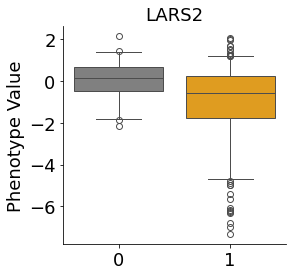

In [9]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(single_genes,
            x = 'overlap with peak', y='orginal phenotype', order=[0,1], 
                        palette=['grey','orange'], legend=False, hue='overlap with peak' , whis = [5,95])
sns.despine()
plt.title('LARS2', fontsize = 18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlabel('')
plt.ylabel('Phenotype Value',fontsize=18)